## Define the function

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# load, normalize, and resize
def load_transform(filepath, 
                   img_size=(16, 16), 
                   contrast=1,                   
                   conv_to_theta=True,
                   flatten=True):
    
    """
    flatten (True/False) - flatten to a vector
    """
    
    # =============================================
    # Assume that this is part of the image collection        

    img = Image.open(filepath)
    
    # change contrast
    #image brightness enhancer
    if contrast != 1:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(contrast)    
    
    # Assume that this is part of the image collection
    img = img.resize(img_size)        
    img = np.array(img) / 255 # normalize
    
    if conv_to_theta:
        img = img * np.pi / 2 # convert to number between 0 and pi/2
    
    if flatten:
        img = img.flatten()
    
    return img

## Test on One image

In [15]:
img_size = (16, 16)

In [17]:
# Flattened
filepath = 'data/train/NonDemented/nonDem1498.jpg'
img = load_transform(filepath, img_size = img_size)
print(img)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.22175948 0.49895883 0.32647924
 0.38191911 0.36959914 0.05543987 0.         0.         0.
 0.         0.         0.         0.         0.         0.03079993
 0.41887902 0.89319791 1.24431709 1.04719755 1.12727736 1.15191731
 0.86855797 0.43119899 0.01231997 0.         0.         0.
 0.         0.         0.01231997 0.50511882 1.08415746 1.33671687
 1.17655725 0.72071831 1.02871759 1.04719755 1.29975696 0.84391803
 0.37575912 0.         0.         0.         0.         0.
 0.34495919 0.94863778 1.21967715 1.33671687 0.9855977  0.67759842
 0.80079813 1.05335754 1.28743699 0.88087794 0.75151824 0.30183929
 0.         0.         0.         0.07391983 0.7268783  0.86855797
 1.25663706 0.73919827 1.10879741 0.8993579  1.05335754 1.05951752
 0.84391803 1.36135682 0.89319791 0.6837584

## Run on All images - Brain

In [18]:
img_size = (16, 16)

In [19]:
import glob
train_set_0 = glob.glob("data/train/NonDemented/*.jpg")
train_set_1 = []
# for k in ['VeryMild', 'Mild', 'Moderate']:
for k in ['Moderate']:
    train_set_1 += glob.glob(f"data/train/{k}Demented/*.jpg")

test_set_0 = glob.glob("data/test/NonDemented/*.jpg")
test_set_1 = []
for k in ['Moderate']:
    test_set_1 += glob.glob(f"data/test/{k}Demented/*.jpg")

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

train_set_0 2560
train_set_1 52
test_set_0 640
test_set_1 12


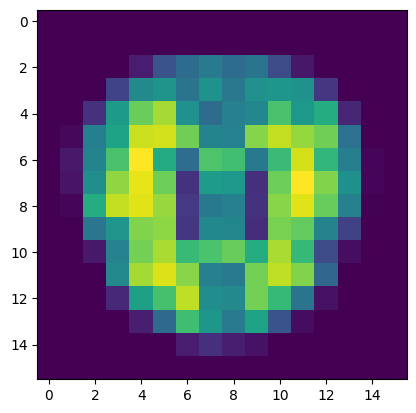

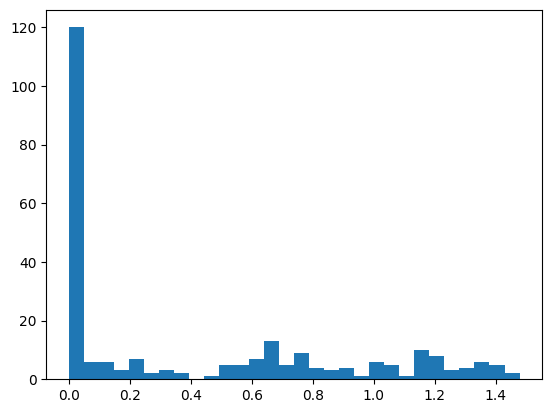

In [20]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_1])

# save
np.save('data/processed/train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/test_set_mtx_1.npy', test_set_1b)

plt.imshow(np.array(test_set_1b[0]))
plt.show()
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

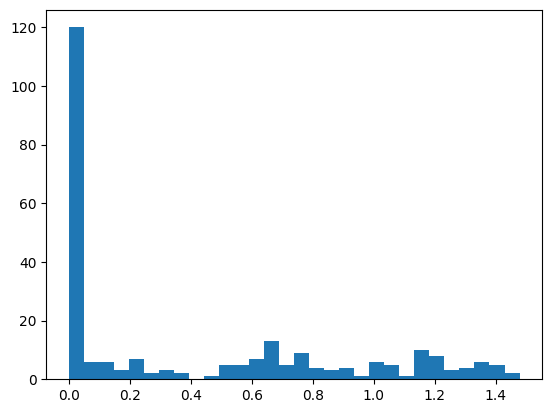

In [21]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size) for f in test_set_1])

# save
np.save('data/processed/train_set_0.npy', train_set_0b)
np.save('data/processed/train_set_1.npy', train_set_1b)

np.save('data/processed/test_set_0.npy', test_set_0b)
np.save('data/processed/test_set_1.npy', test_set_1b)

plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

## Appendix: Run on All images - MNIST

In [22]:
import glob
train_set_0 = glob.glob("data/mnist_train/0/*.jpg")[:50]
train_set_1 = glob.glob("data/mnist_train/1/*.jpg")[:50]

test_set_0 = glob.glob("data/mnist_test/0/*.jpg")[:50]
test_set_1 = glob.glob("data/mnist_test/1/*.jpg")[:50]

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

train_set_0 50
train_set_1 50
test_set_0 50
test_set_1 50


In [23]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size) for f in test_set_1])

# save
np.save('data/processed/mnist_train_set_0.npy', train_set_0b)
np.save('data/processed/mnist_train_set_1.npy', train_set_1b)

np.save('data/processed/mnist_test_set_0.npy', test_set_0b)
np.save('data/processed/mnist_test_set_1.npy', test_set_1b)

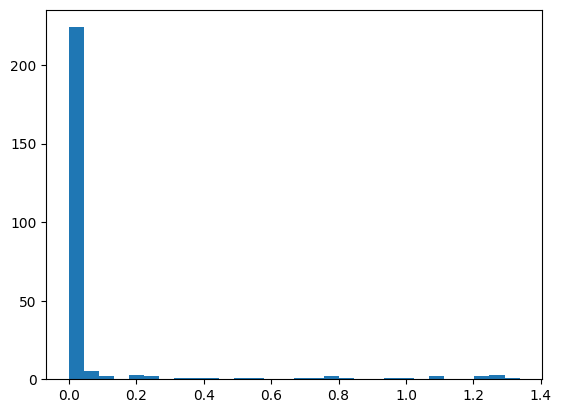

In [24]:
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

In [25]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_1])

# save
np.save('data/processed/mnist_train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/mnist_train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/mnist_test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/mnist_test_set_mtx_1.npy', test_set_1b)

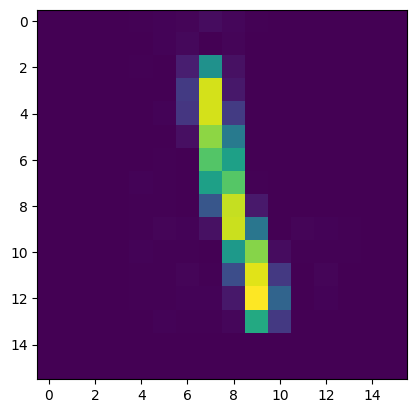

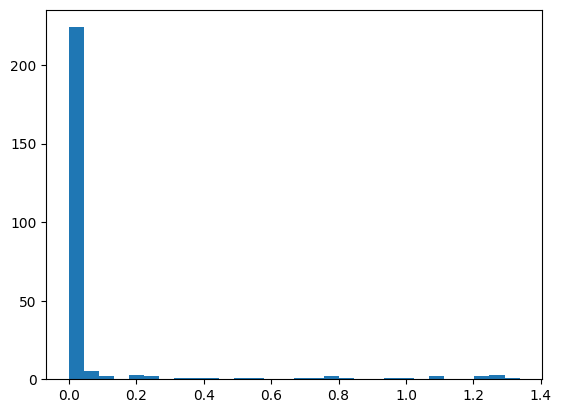

In [26]:
plt.imshow(np.array(test_set_1b[0]))
plt.show()
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()